### Imports 


In [22]:
import json
import os
from PIL import Image
import io
import warnings
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

### Load API Key from config.json

In [23]:
config_path = 'config.json'
with open(config_path, 'r') as config_file:
    config = json.load(config_file)
    STABILITY_KEY = config['STABILITY_KEY']

### Initialize the Stability API Client

In [24]:
# Initialize the Stability API client with the loaded API key
stability_api = client.StabilityInference(
    key=STABILITY_KEY,
    verbose=True,  
    engine="stable-diffusion-xl-1024-v1-0", 
)

### Defining Image Generation Parameters and Generate Images

In [27]:
prompt = "Generate a canine portrait with a mix of textures and bold colors. Set in a cozy window sill with warm sunlight streaming in, the mischievous cat is perched amongst a sea of plush pillows, its fur glistening with playful highlights. Whether lounging in tranquility or ready to pounce, capture the essence of this curious creature with your unique style."
answers = stability_api.generate(
    prompt=prompt,
    seed=4253978046, 
    steps=50,  #image refinement
    cfg_scale=8.0,  # how strongly the generation matches the prompt
    width=1024,  # Image width
    height=1024,  # Image height
    samples=1,  # Number of images to generate
    sampler=generation.SAMPLER_K_DPMPP_2M, 
)

### Display Generated Images

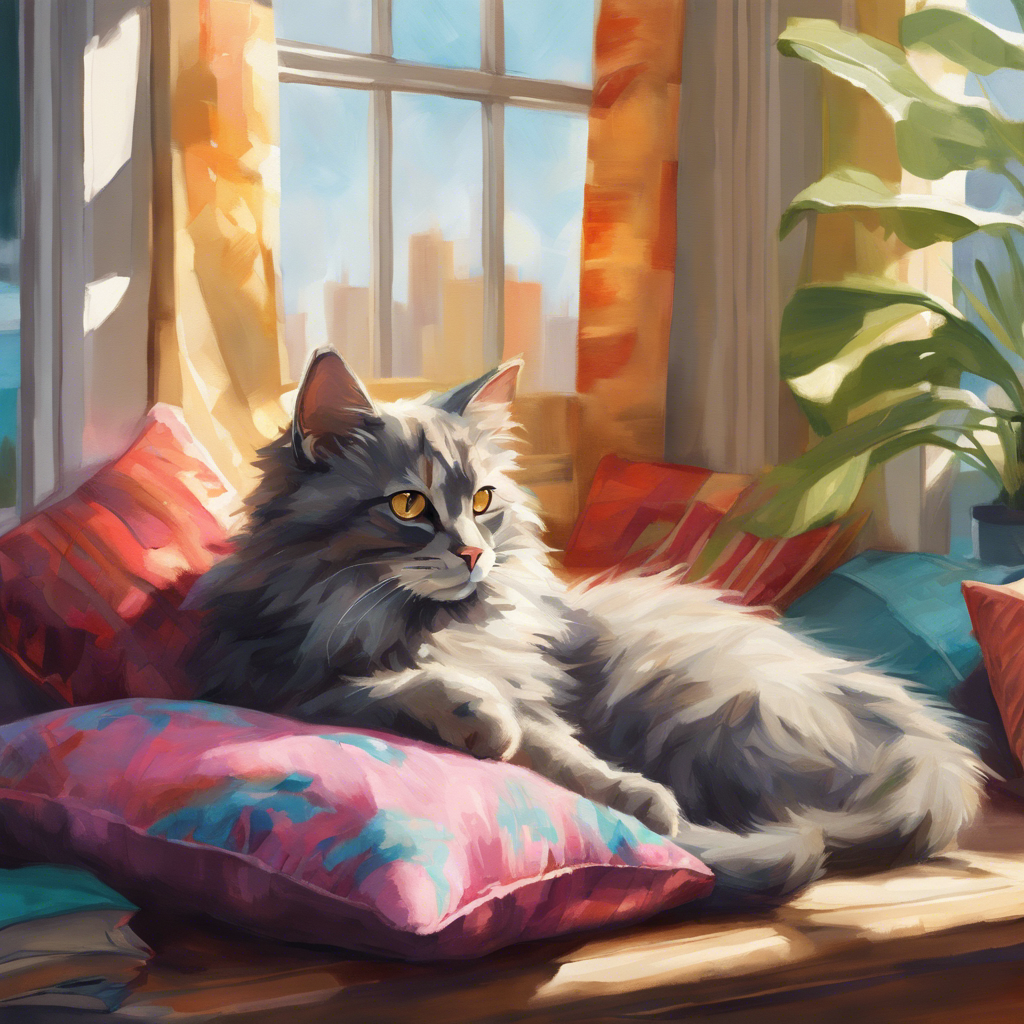

In [28]:
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Your request activated the API's safety filters. Please modify the prompt and try again.")
        elif artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)
